# Sentiment analysis of Restaurant reviews

**Performed by Piyush Borhade**

In [1]:
# importing the libraries  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv('r_data.tsv',delimiter='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
1381,clean,1
1382,less,0
1383,clean,1
1384,less,0


In [4]:
df.shape

(1386, 2)

In [5]:
df['Liked'].value_counts()

Liked
1    792
0    594
Name: count, dtype: int64

In [6]:
# 1 : good review/positive
# 0 : bad review/negative

**data set is balanced!**

In [7]:
s1 = df['Liked'].value_counts()

<Axes: ylabel='Liked'>

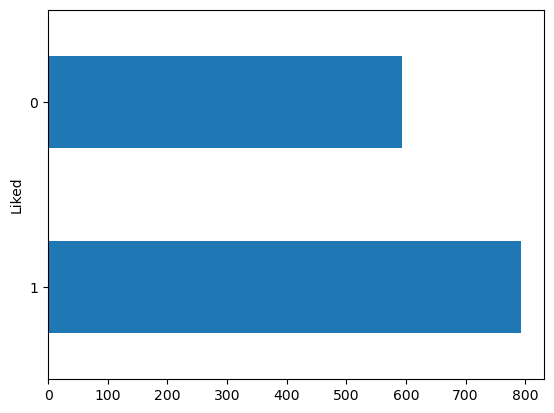

In [8]:
s1.plot(kind='barh')

In [9]:
# missing values

In [10]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [11]:
#Text preprocessing

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
corpus = []

for i in range(len(df)):
    # remove special characters and digits
    mystr = re.sub('[^A-Za-z\s]','',df['Review'][i])
    
    # lower case
    mystr = mystr.lower()
    
    # tokenization
    list1 = mystr.split()
    
    # remove stopwords
    list2 = [ i for i in list1  if i not in set(stopwords.words('english'))]
    
    # stemming
    ps = PorterStemmer()
    list3 = [ps.stem(i)  for i in list2]
    
    # original string
    final = ' '.join(list3)
    corpus.append(final)

In [15]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti didnt tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberrymmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'that rightth red velvet cakeohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'foun

# Vectorization

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [17]:
cv.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
X = cv.fit_transform(corpus).toarray()

In [19]:
y = df['Liked']

In [20]:
X.shape

(1386, 1612)

In [21]:
y.shape

(1386,)

In [22]:
import pickle
f = open('cv.pkl','wb')
pickle.dump(cv,f)
f.close()

In [23]:
# cross validation

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2, random_state=11)

# Model training

**Multinomial Naive Bayes**

In [25]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB()
clf1.fit(X_train,y_train)

MultinomialNB()

In [26]:
# Predicting the Test set results
y_pred = clf1.predict(X_test)

In [27]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)
print("\n")

Confusion Matrix:
 [[ 85  35]
 [ 12 146]]




In [28]:
# Accuracy, Precision and Recall

print('Classification Report\n\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Classification Report

               precision    recall  f1-score   support

           0       0.88      0.71      0.78       120
           1       0.81      0.92      0.86       158

    accuracy                           0.83       278
   macro avg       0.84      0.82      0.82       278
weighted avg       0.84      0.83      0.83       278



Accuracy is  83.09 %
Precision is  0.81
Recall is  0.92


<Axes: >

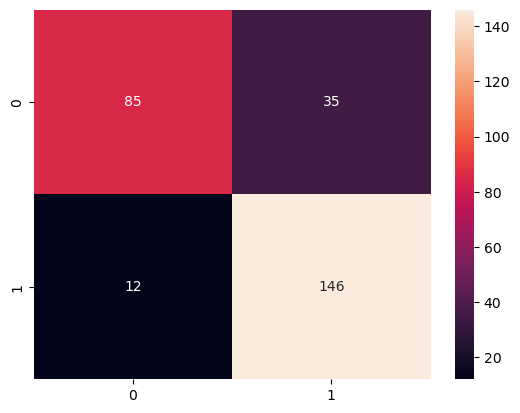

In [29]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

**Bernoulli NB**

In [30]:
from sklearn.naive_bayes import BernoulliNB
clf2 = BernoulliNB()
clf2.fit(X_train,y_train)

BernoulliNB()

In [31]:
# Predicting the Test set results
y_pred = clf2.predict(X_test)

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)
print("\n")


Confusion Matrix:
 [[ 70  50]
 [  8 150]]




In [33]:
# Accuracy, Precision and Recall
print('Classification Report\n\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.58      0.71       120
           1       0.75      0.95      0.84       158

    accuracy                           0.79       278
   macro avg       0.82      0.77      0.77       278
weighted avg       0.81      0.79      0.78       278



Accuracy is  79.14 %
Precision is  0.75
Recall is  0.95


<Axes: >

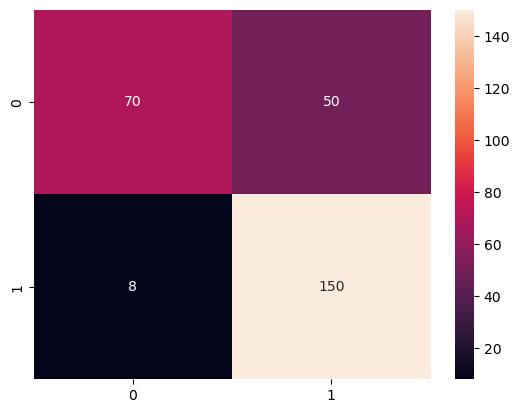

In [34]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

**Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
clf3.fit(X_train,y_train)

LogisticRegression()

In [36]:
# Predicting the Test set results
y_pred = clf3.predict(X_test)

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)
print("\n")

Confusion Matrix:
 [[ 91  29]
 [ 15 143]]




In [38]:
# Accuracy, Precision and Recall
print('Classification Report\n\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Classification Report

               precision    recall  f1-score   support

           0       0.86      0.76      0.81       120
           1       0.83      0.91      0.87       158

    accuracy                           0.84       278
   macro avg       0.84      0.83      0.84       278
weighted avg       0.84      0.84      0.84       278



Accuracy is  84.17 %
Precision is  0.83
Recall is  0.91


<Axes: >

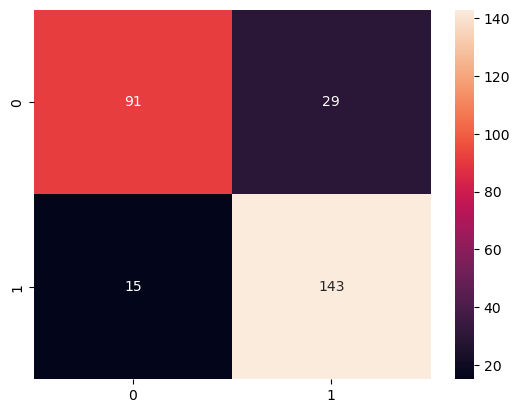

In [39]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

# Multinomial NB is good algorithm by using cross val score!

In [40]:
a = 'very bad'
a_cv = cv.transform([a]).toarray()

In [41]:
clf3.predict(a_cv)

array([0], dtype=int64)

In [42]:
b = 'not bad'

In [43]:
b_cv = cv.transform([b]).toarray()
res = clf3.predict(b_cv)

In [44]:
if "not" in b:
    res[0] = abs(res[0]-1)
print(res[0])

1


In [45]:
d = "food is not good"
d_cv = cv.transform([d]).toarray()
res_d = clf3.predict(d_cv)

In [46]:
if "not" in d:
    res_d[0] = abs(res_d[0]-1)
print(res_d[0])

0


In [47]:
c = 'delicious taste'
c_cv = cv.transform([c]).toarray()
clf3.predict(c_cv)

array([0], dtype=int64)

# Analysis and Conclusion!